# Analysis of the survey 'Enquête rugzakken'

This is a data analysis of the results of the survey 'Enquête rugzakken'.

In [12]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("./data.csv", sep=";")

In [13]:
df

,id,start_time,completion_time,email,name,leeftijdscategorie,onderwijsinstituut,studie_major,rugzak,rugzak_tevreden,...,oplader_vakje,sleutelhangerclip,organisatorische_vakken,zacht_vak,anti_diefstal_ritsen,design,duurzaamheid,andere_opties,andere_verbeteringen,letten_op_duurzaamheid
0,2,12-10-25 12:03:28,12-10-25 12:21:15,anonymous,NaN,24 t/m 30,Zuyd Hogeschool,ICT,Ja,8.0,...,Fijne toevoeging,Niet nodig,Niet nodig,Fijne toevoeging,Liefst wel,Liefst wel,Nodig,Binnenzak heeft rits.,NaN,Een beetje
1,3,12-10-25 12:20:34,12-10-25 12:21:59,anonymous,NaN,18 t/m 23,Zuyd Hogeschool,ICT,Ja,8.0,...,Fijne toevoeging,Niet nodig,Liefst wel,Liefst wel,Liefst wel,Liefst wel,Fijne toevoeging,NaN,NaN,Niet
2,4,12-10-25 12:20:41,12-10-25 12:22:29,anonymous,NaN,18 t/m 23,Zuyd Hogeschool,ICT,Ja,8.0,...,Fijne toevoeging,Niet nodig,Fijne toevoeging,Fijne toevoeging,Fijne toevoeging,Fijne toevoeging,Geen mening,NaN,NaN,Niet
3,5,12-10-25 12:25:45,12-10-25 12:27:35,anonymous,NaN,18 t/m 23,Zuyd Hogeschool,ICT,Ja,10.0,...,Fijne toevoeging,Liefst wel,Liefst wel,Fijne toevoeging,Liefst wel,Fijne toevoeging,Fijne toevoeging,NaN,"Kwaliteit voorop zetten, veel rugzakken zijn n...",Een beetje
4,6,12-10-25 12:30:47,12-10-25 12:33:15,anonymous,NaN,18 t/m 23,Zuyd Hogeschool,NaN,Ja,8.0,...,Fijne toevoeging,Fijne toevoeging,Fijne toevoeging,Fijne toevoeging,Liefst wel,Liefst wel,Niet nodig,NaN,NaN,Niet
5,7,12-10-25 12:40:45,12-10-25 12:42:10,anonymous,NaN,18 t/m 23,Zuyd Hogeschool,ICT,Nee,NaN,...,Nodig,Fijne toevoeging,Geen mening,Liefst wel,Nodig,Liefst wel,Niet nodig,NaN,NaN,Niet
6,8,12-10-25 13:19:14,12-10-25 13:21:02,anonymous,NaN,18 t/m 23,Zuyd Hogeschool,NaN,Ja,8.0,...,Fijne toevoeging,Niet nodig,Niet nodig,Fijne toevoeging,Fijne toevoeging,Fijne toevoeging,Niet nodig,NaN,NaN,Een beetje
7,9,12-10-25 13:26:22,12-10-25 13:31:05,anonymous,NaN,18 t/m 23,Zuyd Hogeschool,ICT,Ja,9.0,...,Nodig,Fijne toevoeging,Nodig,Liefst wel,Nodig,Nodig,Liefst wel,Uitvouwbaar design voor grotere spullen en een...,NaN,Best wel
8,10,12-10-25 13:45:26,12-10-25 13:47:51,anonymous,NaN,18 t/m 23,Zuyd Hogeschool,ICT,Ja,7.0,...,Liefst wel,Liefst wel,Liefst wel,Liefst wel,Liefst wel,Fijne toevoeging,Fijne toevoeging,Extra vakje voor pennen en dergelijke.,Verder niet.,Best wel
9,11,12-10-25 13:45:07,12-10-25 13:48:06,anonymous,NaN,18 t/m 23,Zuyd Hogeschool,ICT,Ja,9.0,...,Fijne toevoeging,Niet nodig,Fijne toevoeging,Fijne toevoeging,Niet nodig,Liefst wel,Liefst wel,Klein rits vakje aan de buitenkant van de tas ...,NaN,Best wel


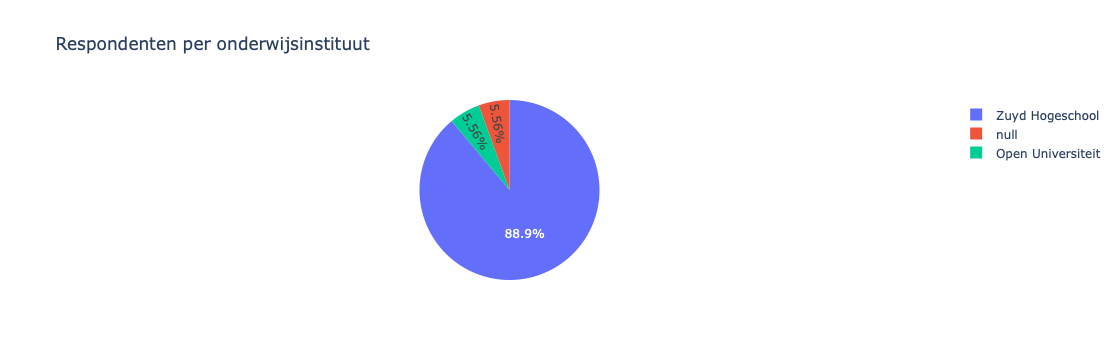

In [21]:
fig = px.pie(
    df,
    title="Respondenten per onderwijsinstituut",
    names="onderwijsinstituut",
)

fig.show()

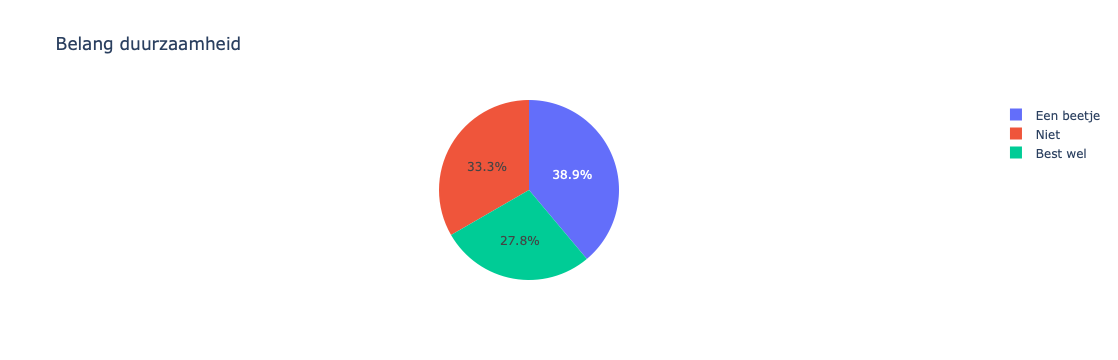

In [22]:
fig = px.pie(
    df,
    title="Belang duurzaamheid",
    names="letten_op_duurzaamheid",
)

fig.show()

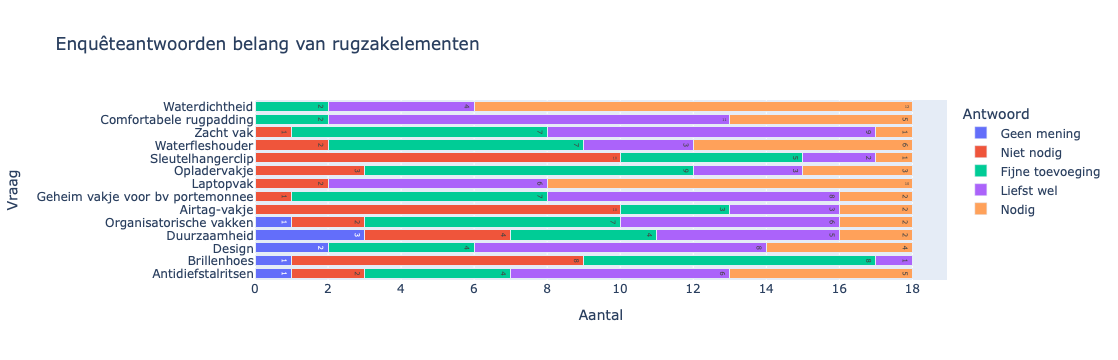

In [47]:
columns = [
    'laptopvak', 'brillenhoes', 'airtag_vak', 'waterfleshouder', 'geheim_vakje',
    'waterdichtheid', 'comfortabele_rugpadding', 'oplader_vakje', 'sleutelhangerclip',
    'organisatorische_vakken', 'zacht_vak', 'anti_diefstal_ritsen', 'design', 'duurzaamheid'
]

df_melted = df[columns].melt(var_name='Vraag', value_name='Antwoord')

counts = df_melted.groupby(['Vraag', 'Antwoord']).size().reset_index(name='Aantal')

category_order = ["Geen mening", "Niet nodig", "Fijne toevoeging", "Liefst wel", "Nodig"]
counts['Antwoord'] = pd.Categorical(counts['Antwoord'], categories=category_order, ordered=True)

display_names = {
    "laptopvak": "Laptopvak",
    "brillenhoes": "Brillenhoes",
    "airtag_vak": "Airtag-vakje",
    "waterfleshouder": "Waterfleshouder",
    "geheim_vakje": "Geheim vakje voor bv portemonnee",
    "waterdichtheid": "Waterdichtheid",
    "comfortabele_rugpadding": "Comfortabele rugpadding",
    "oplader_vakje": "Opladervakje",
    "sleutelhangerclip": "Sleutelhangerclip",
    "organisatorische_vakken": "Organisatorische vakken",
    "zacht_vak": "Zacht vak",
    "anti_diefstal_ritsen": "Antidiefstalritsen",
    "design": "Design",
    "duurzaamheid": "Duurzaamheid",
    
}
counts['Vraag'] = counts['Vraag'].replace(display_names)

fig = px.bar(
    counts,
    x='Aantal',
    y='Vraag',
    color='Antwoord',
    category_orders={'Antwoord': category_order},
    orientation='h',
    text='Aantal',
    title="Enquêteantwoorden belang van rugzakelementen"
)

fig.update_layout(
    barmode='stack',
    yaxis={
        'tickmode':'array',
        'tickvals':counts['Vraag'].unique(),
        'ticktext':counts['Vraag'].unique(),
        'categoryorder':'total ascending',
    },
)

fig.show()